In [1]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("C:/Users/Admin/Desktop/CAN ALM/thuc hanh/Online Retail.csv", encoding='ISO-8859-1')

# Hiển thị thông tin tổng quan
print("Thông tin chung về dữ liệu:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())

Thông tin chung về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

5 dòng đầu tiên:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE

In [2]:
## Thống kê mô tả
print("\nThống kê mô tả:")
print(df.describe())

# Kiểm tra số dòng trùng lặp
duplicate_rows = df.duplicated().sum()
print(f"\nSố dòng bị trùng lặp: {duplicate_rows}")

# Kiểm tra số lượng giao dịch duy nhất
num_invoices = df['InvoiceNo'].nunique()
print(f"Số lượng giao dịch (InvoiceNo) duy nhất: {num_invoices}")

# Kiểm tra số khách hàng duy nhất
num_customers = df['CustomerID'].nunique()
print(f"Số lượng khách hàng duy nhất: {num_customers}")

# Kiểm tra số quốc gia
num_countries = df['Country'].nunique()
print(f"Số lượng quốc gia: {num_countries}")
print(f"Các quốc gia:\n{df['Country'].unique()}")




Thống kê mô tả:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Số dòng bị trùng lặp: 5268
Số lượng giao dịch (InvoiceNo) duy nhất: 25900
Số lượng khách hàng duy nhất: 4372
Số lượng quốc gia: 38
Các quốc gia:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified

In [3]:

# Kiểm tra các giá trị thiếu
print("\nSố lượng giá trị thiếu:")
print(df.isnull().sum())


Số lượng giá trị thiếu:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# 1. Loại bỏ các dòng thiếu thông tin quan trọng
df.dropna(subset=['InvoiceNo', 'StockCode', 'Description', 'CustomerID'], inplace=True)

# 2. Loại bỏ các hóa đơn bị hủy (InvoiceNo bắt đầu bằng 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Loại bỏ các dòng có Quantity <= 0 hoặc UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 4. Chuyển kiểu dữ liệu cột 'InvoiceDate' về dạng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 5. Tạo thêm cột 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Kiểm tra kết quả
print("Dữ liệu sau xử lý:")
print(df.info())


Dữ liệu sau xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


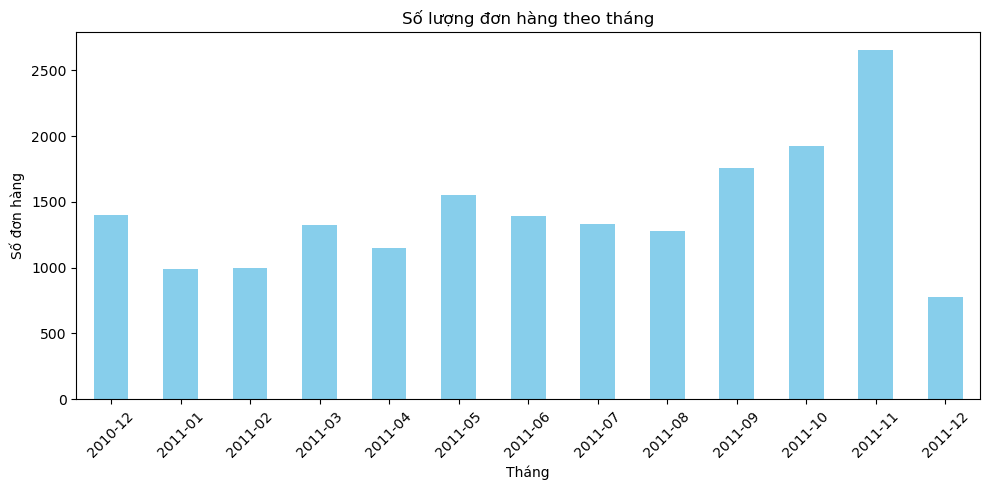

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Thêm cột 'Month' để nhóm theo tháng
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Tính số lượng đơn hàng theo tháng
monthly_orders = df.groupby('Month')['InvoiceNo'].nunique()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title('Số lượng đơn hàng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


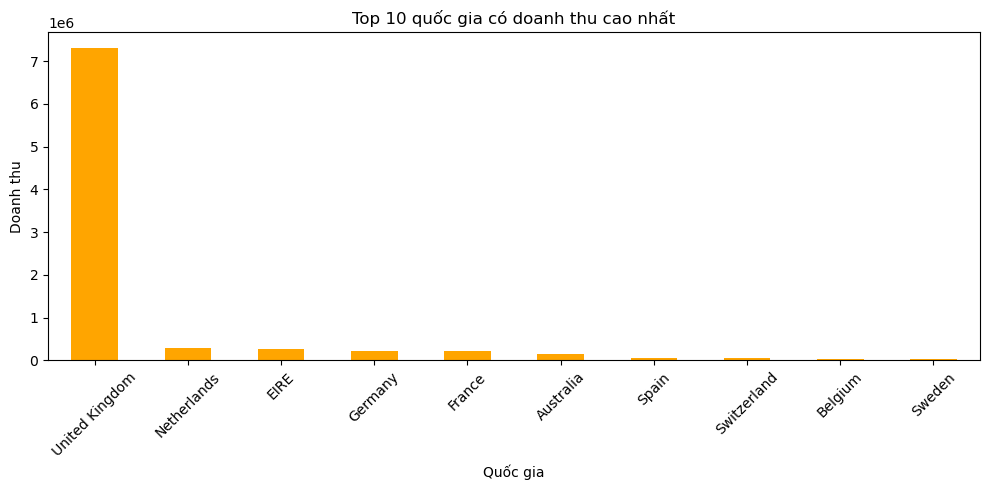

In [6]:
# Tính tổng doanh thu theo quốc gia
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Lấy top 10 quốc gia có doanh thu cao nhất (ngoại trừ UK nếu muốn)
top_countries = country_revenue.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 quốc gia có doanh thu cao nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

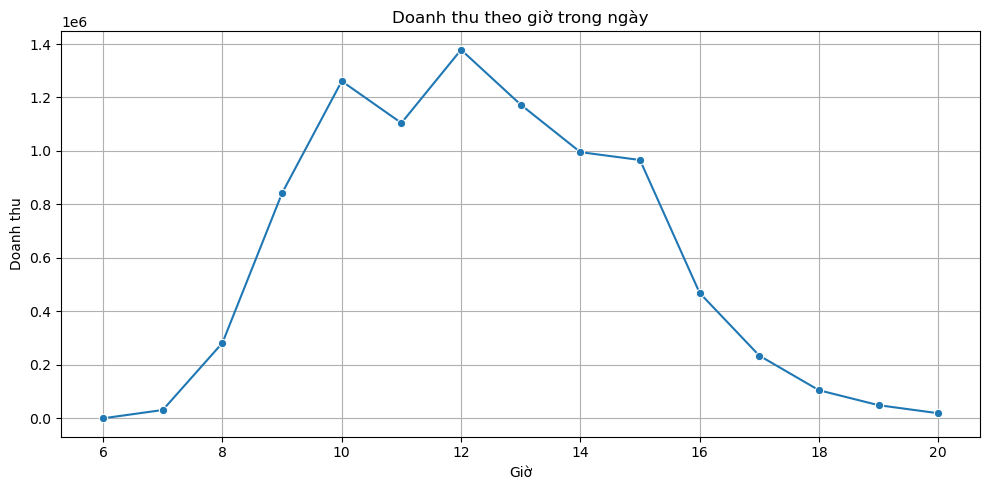

In [7]:
# Thêm cột 'Hour' để phân tích theo giờ
df['Hour'] = df['InvoiceDate'].dt.hour

# Tính doanh thu theo giờ
hourly_revenue = df.groupby('Hour')['TotalPrice'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o')
plt.title('Doanh thu theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.tight_layout()
plt.show()


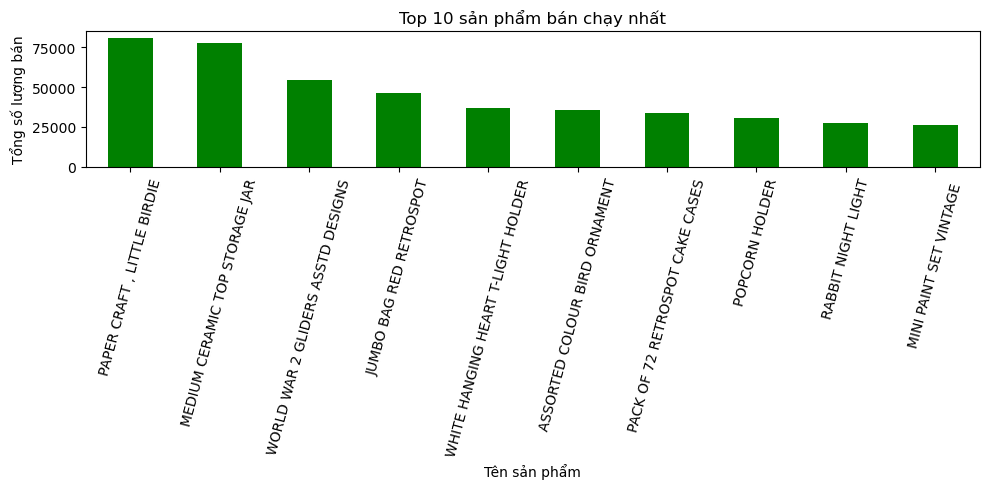

In [8]:
# Tính tổng số lượng bán được theo sản phẩm
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 sản phẩm bán chạy nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Tổng số lượng bán')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\3897544605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='coolwarm')


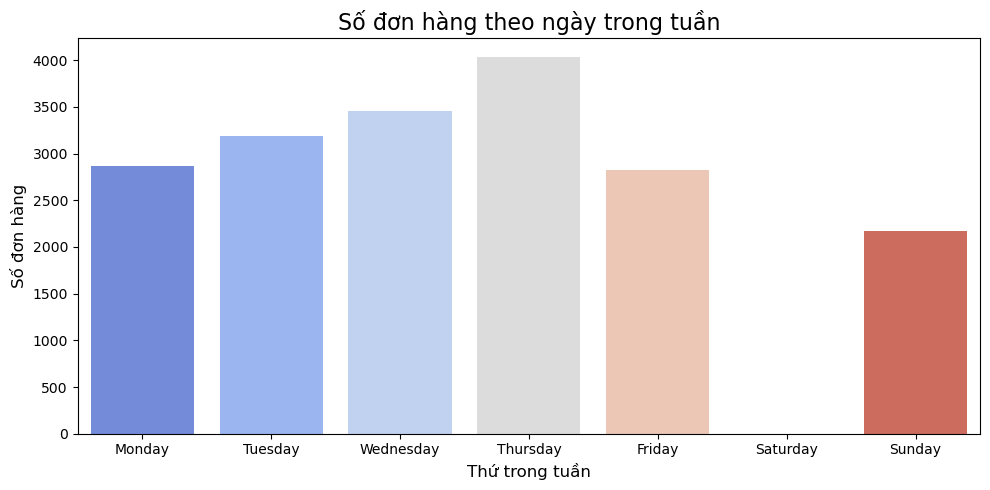

In [9]:
df['Weekday'] = df['InvoiceDate'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day = df.groupby('Weekday')['InvoiceNo'].nunique().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='coolwarm')
plt.title('Số đơn hàng theo ngày trong tuần', fontsize=16)
plt.xlabel('Thứ trong tuần', fontsize=12)
plt.ylabel('Số đơn hàng', fontsize=12)
plt.tight_layout()
plt.show()


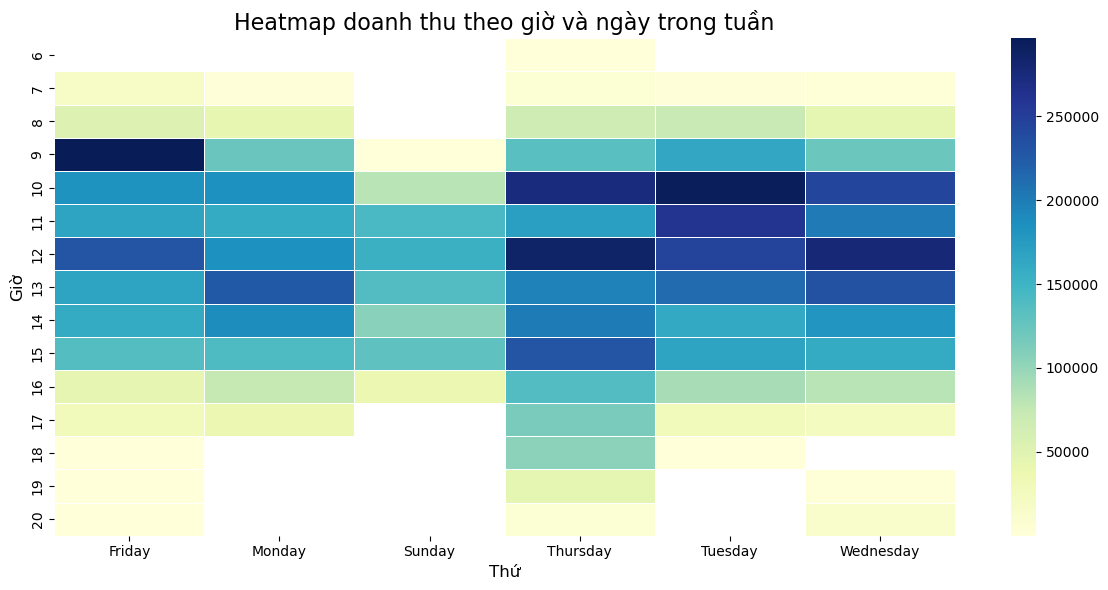

In [10]:
df['Date'] = df['InvoiceDate'].dt.date
pivot_table = df.pivot_table(index=df['InvoiceDate'].dt.hour,
                              columns=df['InvoiceDate'].dt.day_name(),
                              values='TotalPrice',
                              aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap doanh thu theo giờ và ngày trong tuần', fontsize=16)
plt.xlabel('Thứ', fontsize=12)
plt.ylabel('Giờ', fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# Lọc chỉ lấy đơn hàng tại UK để đơn giản
df_uk = df[df['Country'] == 'United Kingdom']

# Tạo bảng giỏ hàng: mỗi dòng là một hóa đơn, mỗi cột là sản phẩm (1 nếu có mua, 0 nếu không)
basket = (df_uk
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum()
          .unstack()
          .fillna(0))

# Đưa về dạng 1/0
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\3734041393.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import time
from tabulate import tabulate

# Giả định basket_sets đã được định dạng đúng (DataFrame nhị phân)
start_apriori = time.time()

# Tìm tập mục thường xuyên với min_support=0.02
frequent_apriori = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Sinh luật kết hợp với min_lift=1
rules_apriori = association_rules(frequent_apriori, metric='lift', min_threshold=1)

end_apriori = time.time()
print(f"⏱ Apriori tìm được {len(rules_apriori)} luật trong {end_apriori - start_apriori:.2f} giây")

# Làm tròn các giá trị số để dễ đọc
rules_apriori['support'] = rules_apriori['support'].round(4)
rules_apriori['confidence'] = rules_apriori['confidence'].round(4)
rules_apriori['lift'] = rules_apriori['lift'].round(4)

# Chọn các cột quan trọng để hiển thị
display_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
formatted_rules = rules_apriori[display_columns].sort_values(by='lift', ascending=False).head(10)  # Lấy top 10

# Định dạng lại cột antecedents và consequents để hiển thị dưới dạng chuỗi
formatted_rules['antecedents'] = formatted_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
formatted_rules['consequents'] = formatted_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Hiển thị bảng đẹp với tabulate
print("\n🔍 Top 10 luật Apriori (theo lift):")
print(tabulate(formatted_rules, headers=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'], tablefmt='psql', showindex=False, floatfmt='.4f'))

c:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


⏱ Apriori tìm được 76 luật trong 44.48 giây

🔍 Top 10 luật Apriori (theo lift):
+-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------+
| Antecedents                                                       | Consequents                                                       |   Support |   Confidence |    Lift |
|-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------|
| GREEN REGENCY TEACUP AND SAUCER                                   | ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  |    0.0205 |       0.5572 | 24.2167 |
| ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  | GREEN REGENCY TEACUP AND SAUCER                                   |    0.0205 |       0.8903 | 24.2167 |
| PINK REGENCY TEACUP AND SAUCER             

In [13]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time
from tabulate import tabulate

# Giả định basket_sets đã được định dạng đúng (DataFrame nhị phân)
start_fpg = time.time()

# Tìm tập mục thường xuyên bằng FP-Growth với min_support=0.02
frequent_fpg = fpgrowth(basket_sets, min_support=0.02, use_colnames=True)

# Sinh luật kết hợp với min_lift=1
rules_fpg = association_rules(frequent_fpg, metric='lift', min_threshold=1)

end_fpg = time.time()
print(f"⚡ FP-Growth tìm được {len(rules_fpg)} luật trong {end_fpg - start_fpg:.2f} giây")

# Làm tròn các giá trị số để dễ đọc
rules_fpg['support'] = rules_fpg['support'].round(4)
rules_fpg['confidence'] = rules_fpg['confidence'].round(4)
rules_fpg['lift'] = rules_fpg['lift'].round(4)

# Chọn các cột quan trọng để hiển thị
display_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
formatted_rules = rules_fpg[display_columns].sort_values(by='lift', ascending=False).head(10)  # Lấy top 10

# Định dạng lại cột antecedents và consequents để hiển thị dưới dạng chuỗi
formatted_rules['antecedents'] = formatted_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
formatted_rules['consequents'] = formatted_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Hiển thị bảng đẹp với tabulate
print("\n🔍 Top 10 luật FP-Growth (theo lift):")
print(tabulate(formatted_rules, headers=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'], tablefmt='psql', showindex=False, floatfmt='.4f'))

c:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


⚡ FP-Growth tìm được 76 luật trong 11.32 giây

🔍 Top 10 luật FP-Growth (theo lift):
+-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------+
| Antecedents                                                       | Consequents                                                       |   Support |   Confidence |    Lift |
|-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------|
| GREEN REGENCY TEACUP AND SAUCER                                   | ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  |    0.0205 |       0.5572 | 24.2167 |
| ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  | GREEN REGENCY TEACUP AND SAUCER                                   |    0.0205 |       0.8903 | 24.2167 |
| ROSES REGENCY TEACUP AND SAUCER , GREEN

In [14]:
summary = pd.DataFrame({
    'Thuật toán': ['Apriori', 'FP-Growth'],
    'Số luật tìm được': [len(rules_apriori), len(rules_fpg)],
    'Thời gian (giây)': [end_apriori - start_apriori, end_fpg - start_fpg]
})

print(summary)


  Thuật toán  Số luật tìm được  Thời gian (giây)
0    Apriori                76         44.481355
1  FP-Growth                76         11.321751


C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\3262925604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['Thuật toán'], y=summary['Thời gian (giây)'], palette='Set2')


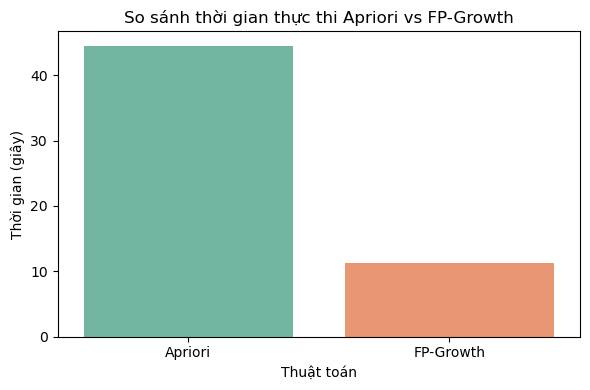

In [15]:
# Vẽ biểu đồ so sánh thời gian thực thi của hai thuật toán
plt.figure(figsize=(6, 4))
sns.barplot(x=summary['Thuật toán'], y=summary['Thời gian (giây)'], palette='Set2')
plt.title('So sánh thời gian thực thi Apriori vs FP-Growth')
plt.ylabel('Thời gian (giây)')
plt.xlabel('Thuật toán')
plt.tight_layout()
plt.show()

In [29]:
# Tính tổng CPU và RAM đã sử dụng cho từng thuật toán
resource_usage_2algos['CPU đã sử dụng (MB)'] = resource_usage_2algos['CPU (%)']
resource_usage_2algos['RAM đã sử dụng (MB)'] = resource_usage_2algos['RAM (MB)']

print(resource_usage_2algos[['Thuật toán', 'CPU đã sử dụng (MB)', 'RAM đã sử dụng (MB)']])

  Thuật toán  CPU đã sử dụng (MB)  RAM đã sử dụng (MB)
0    Apriori                24.94                68.15
1  FP-Growth                24.97                71.54


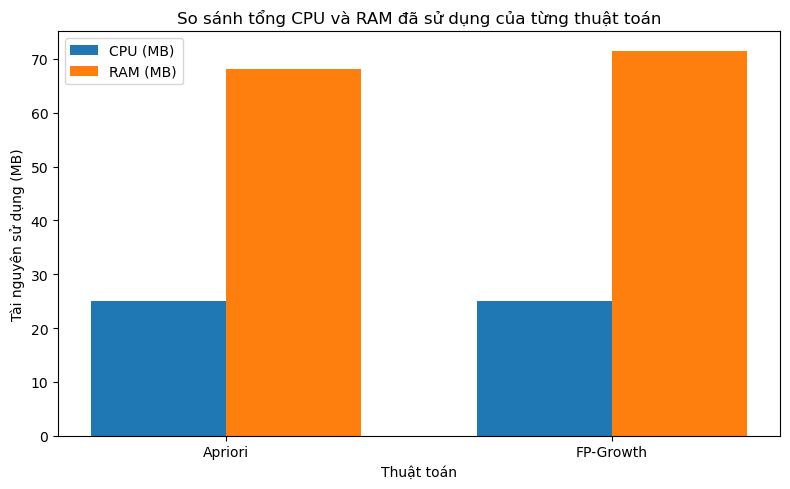

In [30]:
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = range(len(resource_usage_2algos['Thuật toán']))

plt.bar(index, resource_usage_2algos['CPU đã sử dụng (MB)'], bar_width, label='CPU (MB)', color='tab:blue')
plt.bar([i + bar_width for i in index], resource_usage_2algos['RAM đã sử dụng (MB)'], bar_width, label='RAM (MB)', color='tab:orange')

plt.xlabel('Thuật toán')
plt.ylabel('Tài nguyên sử dụng (MB)')
plt.title('So sánh tổng CPU và RAM đã sử dụng của từng thuật toán')
plt.xticks([i + bar_width / 2 for i in index], resource_usage_2algos['Thuật toán'])
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\4162030635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


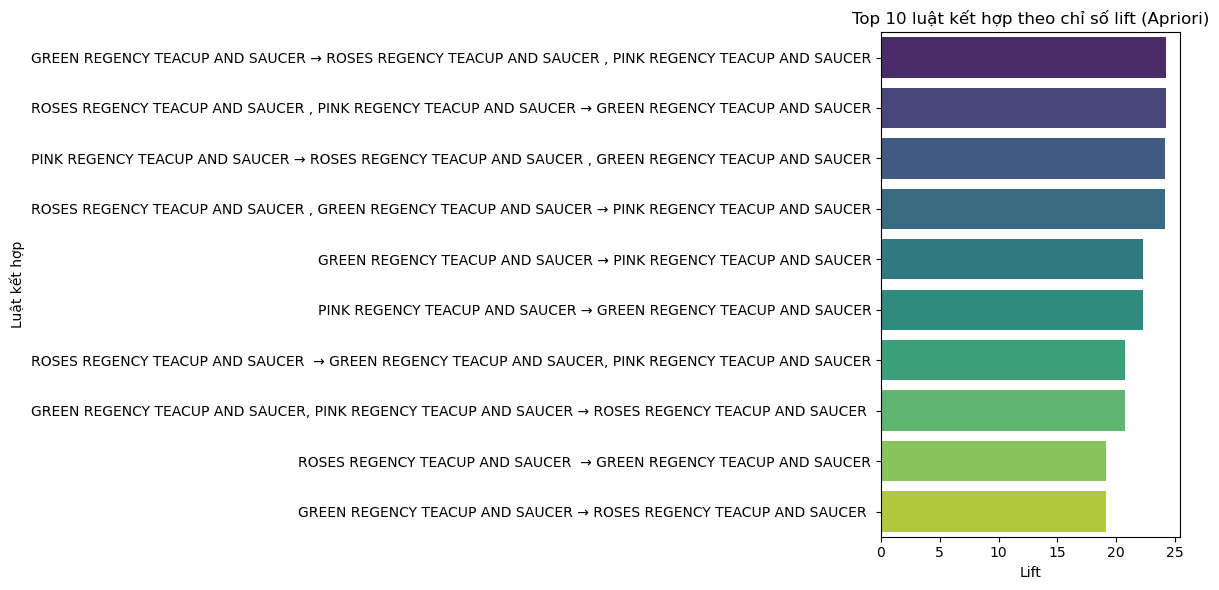

In [16]:
# Trực quan hóa top 10 luật kết hợp theo chỉ số lift (dùng Apriori)
if 'rules_apriori' not in locals():
    print("⚠️ Bạn cần chạy cell sinh luật kết hợp Apriori trước khi trực quan hóa!")
else:
    top_rules = rules_apriori.sort_values(by='lift', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_rules['lift'],
        y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + top_rules['consequents'].apply(lambda x: ', '.join(list(x))),
        palette='viridis'
    )
    plt.xlabel('Lift')
    plt.ylabel('Luật kết hợp')
    plt.title('Top 10 luật kết hợp theo chỉ số lift (Apriori)')
    plt.tight_layout()
    plt.show()